<style type="text/css">
table td{
border:none;
}
</style>

<table>
    <tr>
        <td width=15%><img src="../img/logoIGE_Color_Light.jpg"></img></td>
        <td>
            <center>
                <h1>Machine Learning for prediciting RX localization</h1> <br>
                May - July 2022 <br>
                IGE internship
            </center>
            Renan MANCEAUX <br>
            Supervisor :<br>
            Thomas CHAUVE
        </td>
        <td width=20%><img src="../img/logo_UGA_imag.png"></img></td>
    </tr>
</table>

<center><h1> Data Computing </h1></center>

----------------------------

<center> <h1> Anisotropy factors of nearest Triple Junction </h1> <center>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import sys
sys.path.append("../")
import utils

import xarray as xr
import xarrayaita.aita as xa
import pickle

In [2]:
file = open('../data/craft/CI02.xr', 'rb')
ds = pickle.load(file)
file.close()

# Compute orientations of grains of the nearest TJ

In [3]:
ds['schmid']=ds.orientation.uvecs.calc_schmid(np.array([0,1,0]))

ds['TJ'] = ds.aita.TJ_map()

ds['dist2TJ2'] = ds.aita.dist2TJ_labels()

ds['val_or3'] = ds.aita.closest_outTJ_value(ds.orientation) 

# Compute anisotropy factors from orientations

In [4]:
ds['an_fact'] = ds.aita.anisotropy_factors()

Text(0.5, 1.0, 'Flatness anisotropy')

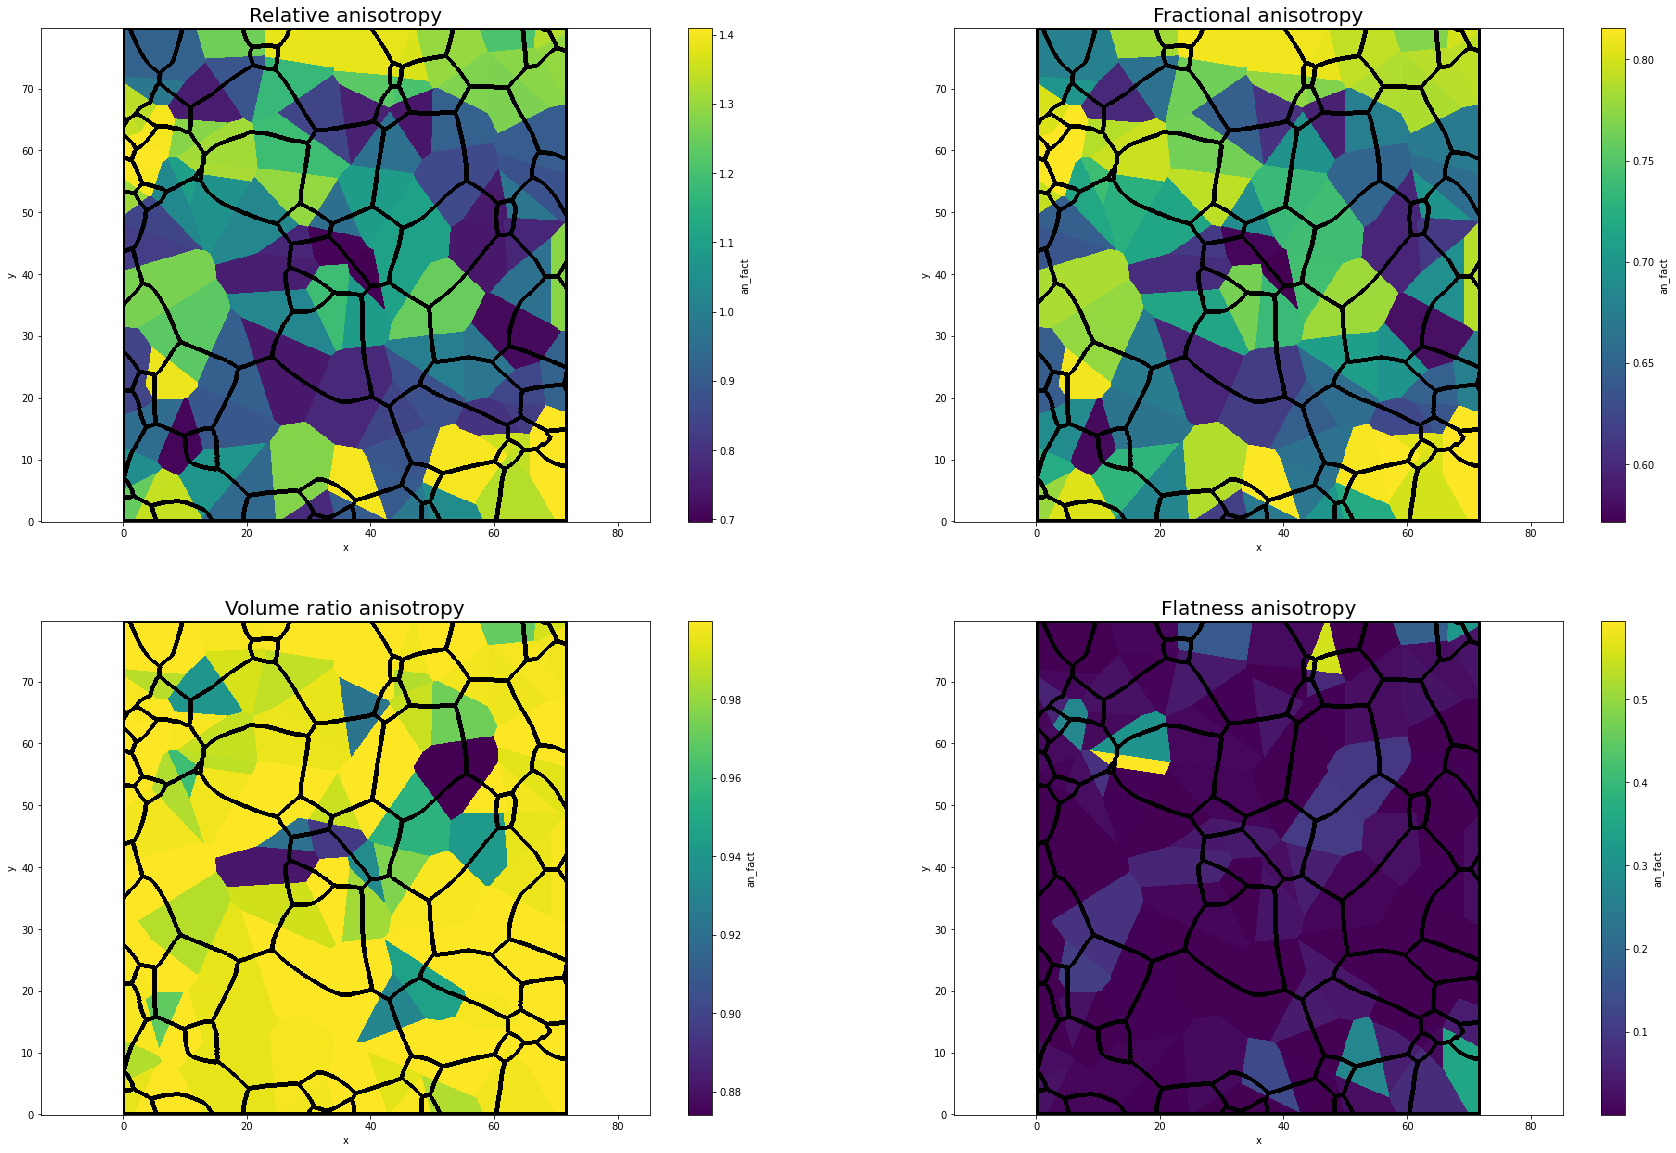

In [5]:
plt.figure(figsize=(30,20))
plt.subplot(221)
ds.an_fact[:,:,0].plot()
ds.aita.plotBoundary(dilatation =2,cmap=cm.gray_r, vmin=0, vmax =1)
plt.axis('equal')
plt.title('Relative anisotropy',fontsize = 20)
plt.subplot(222)
ds.an_fact[:,:,1].plot()
ds.aita.plotBoundary(dilatation =2,cmap=cm.gray_r, vmin=0, vmax =1)
plt.axis('equal')
plt.title('Fractional anisotropy',fontsize = 20)
plt.subplot(223)
ds.an_fact[:,:,2].plot()
ds.aita.plotBoundary(dilatation =2,cmap=cm.gray_r, vmin=0, vmax =1)
plt.axis('equal')
plt.title('Volume ratio anisotropy',fontsize = 20)
plt.subplot(224)
ds.an_fact[:,:,3].plot()
ds.aita.plotBoundary(dilatation =2,cmap=cm.gray_r, vmin=0, vmax =1)
plt.axis('equal')
plt.title('Flatness anisotropy',fontsize = 20)

# Correlation matrix

In [2]:
CI02 = utils.load_data("../data/for_learning_plus/CI02.npy")
CI04 = utils.load_data("../data/for_learning_plus/CI04.npy")
CI06 = utils.load_data("../data/for_learning_plus/CI06.npy")
CI09 = utils.load_data("../data/for_learning_plus/CI09.npy")
CI21 = utils.load_data("../data/for_learning_plus/CI21.npy")

X = pd.concat((CI02,CI04,CI06,CI09,CI21))

Text(0.5, 1.0, 'Correlation Matrix')

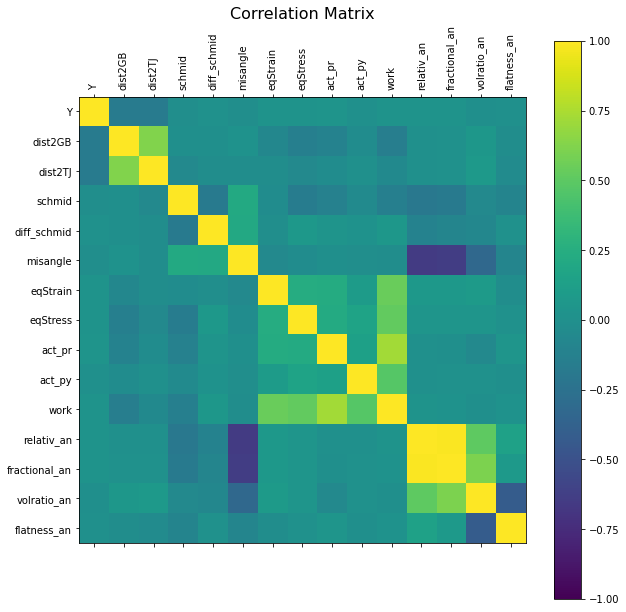

In [5]:
f = plt.figure(figsize=(10,10))
plt.matshow(X.corr(),fignum=f.number,vmin=-1,vmax = 1)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.yticks(range(X.shape[1]), X.columns)
cb = plt.colorbar()
plt.title('Correlation Matrix', fontsize=16)